In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
color_pal=sns.color_palette()
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [29]:
df=pd.read_csv('product i_basemodel.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [30]:
sales_i= df.drop(['Product Name','Product Category','Month','Year', 'SMA_12months','SMA_6months','SMA_3months'],axis=1)

In [31]:
sales_i.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [32]:
sales_i.head()

,Sales
Month-Year,
2019-01-01,50833
2019-02-01,65670
2019-03-01,89667
2019-04-01,60960
2019-05-01,43410


<Axes: title={'center': 'Product I'}, xlabel='Month-Year'>

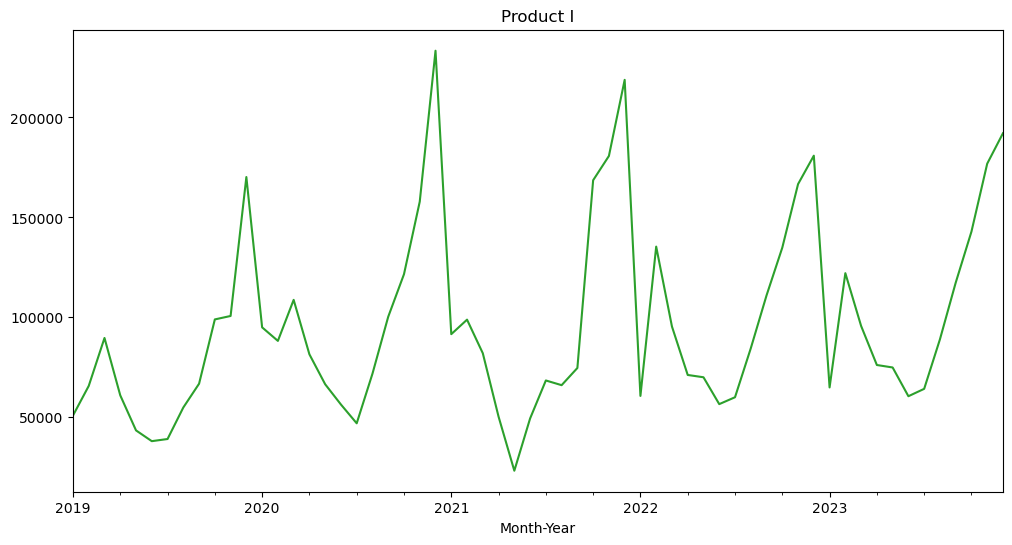

In [33]:
sales_i['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product I')

In [34]:
train_12= sales_i[:48]
test_12= sales_i[48:]

In [35]:
y_hat_sma = sales_i.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = sales_i['Sales'].rolling(ma_window).mean().shift()
y_hat_sma['sma_forecast'][len(train_12):] = y_hat_sma['sma_forecast'][len(train_12)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\2995619851.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma['sma_forecast'][len(train_12):] = y_hat_sma['sma_forecast'][len(train_12)]


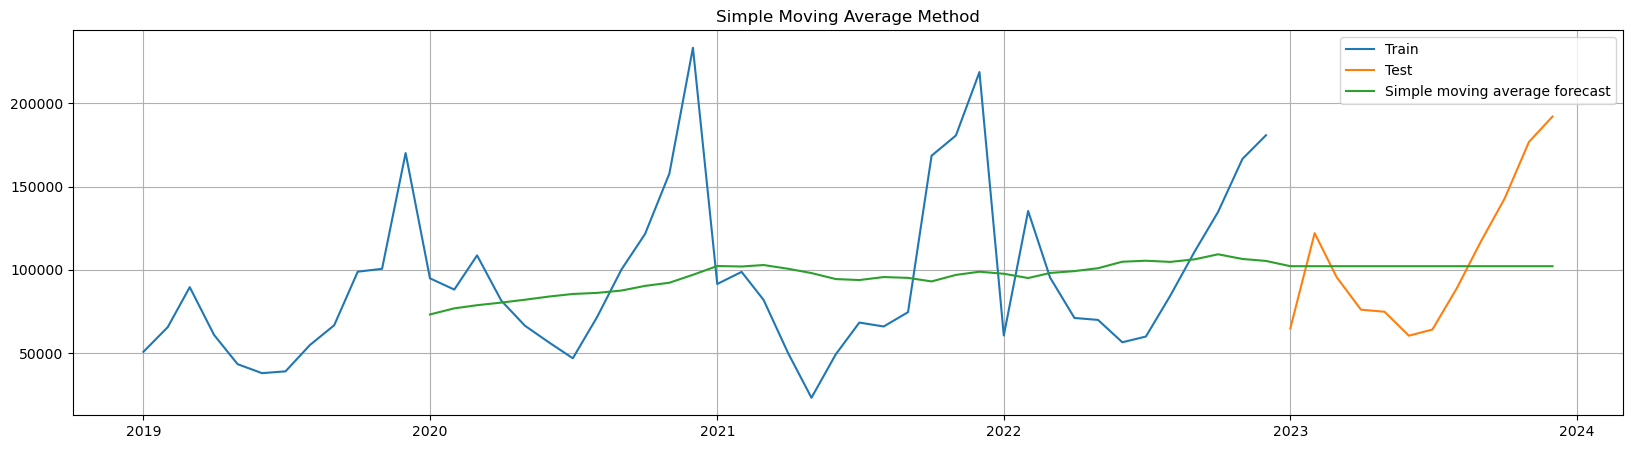

In [36]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_12['Sales'], label='Train')
plt.plot(test_12['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [37]:
y_hat_sma

,Sales,sma_forecast
Month-Year,,
2019-01-01,50833,NaN
2019-02-01,65670,NaN
2019-03-01,89667,NaN
2019-04-01,60960,NaN
2019-05-01,43410,NaN
2019-06-01,38023,NaN
2019-07-01,39097,NaN
2019-08-01,54870,NaN
2019-09-01,66773,NaN


In [38]:
pred_12= y_hat_sma['sma_forecast'].iloc[48:]

In [39]:
pred_12

Month-Year
2023-01-01    102248.583333
2023-02-01    102248.583333
2023-03-01    102248.583333
2023-04-01    102248.583333
2023-05-01    102248.583333
2023-06-01    102248.583333
2023-07-01    102248.583333
2023-08-01    102248.583333
2023-09-01    102248.583333
2023-10-01    102248.583333
2023-11-01    102248.583333
2023-12-01    102248.583333
Name: sma_forecast, dtype: float64

In [40]:
mae_12= mean_absolute_error(test_12,pred_12)
mse_12=mean_squared_error(test_12,pred_12)
mape_12= mean_absolute_percentage_error(test_12,pred_12)
rmse_12= np.sqrt(mean_squared_error(test_12,pred_12))

print(f'MAE - Simple Moving Averages_12 months: {mae_12:0.3f}')
print(f'MAPE - Simple Moving Averages_12 months: {mape_12:0.3f}')
print(f'MSE - Simple Moving Averages_12 months: {mse_12:0.3f}')
print(f'RMSE - Simple Moving Averages_12 months: {rmse_12:0.3f}')

MAE - Simple Moving Averages_12 months: 35874.847
MAPE - Simple Moving Averages_12 months: 0.354
MSE - Simple Moving Averages_12 months: 1846209230.299
RMSE - Simple Moving Averages_12 months: 42967.537


In [41]:
train_6= sales_i[:54]
test_6= sales_i[54:]

In [42]:
y_hat_sma_6 = sales_i.copy()
ma_window_6 = 6
y_hat_sma_6['sma_forecast'] = sales_i['Sales'].rolling(ma_window_6).mean().shift()
y_hat_sma_6['sma_forecast'][len(train_6):] = y_hat_sma_6['sma_forecast'][len(train_6)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\687162135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma_6['sma_forecast'][len(train_6):] = y_hat_sma_6['sma_forecast'][len(train_6)]


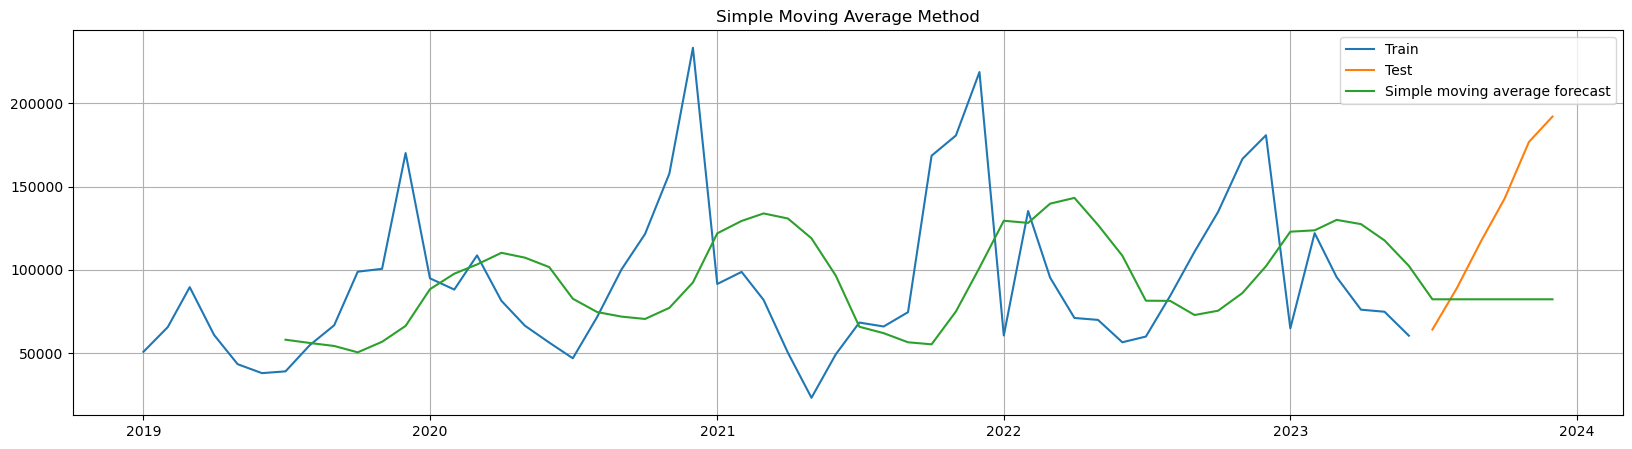

In [43]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_6['Sales'], label='Train')
plt.plot(test_6['Sales'], label='Test')
plt.plot(y_hat_sma_6['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [44]:
y_hat_sma_6

,Sales,sma_forecast
Month-Year,,
2019-01-01,50833,NaN
2019-02-01,65670,NaN
2019-03-01,89667,NaN
2019-04-01,60960,NaN
2019-05-01,43410,NaN
2019-06-01,38023,NaN
2019-07-01,39097,58093.833333
2019-08-01,54870,56137.833333
2019-09-01,66773,54337.833333


In [45]:
pred_6= y_hat_sma_6['sma_forecast'].iloc[54:]

In [46]:
pred_6

Month-Year
2023-07-01    82372.666667
2023-08-01    82372.666667
2023-09-01    82372.666667
2023-10-01    82372.666667
2023-11-01    82372.666667
2023-12-01    82372.666667
Name: sma_forecast, dtype: float64

In [47]:
mae_6= mean_absolute_error(test_6,pred_6)
mse_6=mean_squared_error(test_6,pred_6)
mape_6= mean_absolute_percentage_error(test_6,pred_6)
rmse_6= np.sqrt(mean_squared_error(test_6,pred_6))

print(f'MAE - Simple Moving Averages_6 months: {mae_6:0.3f}')
print(f'MAPE - Simple Moving Averages_6 months: {mape_6:0.3f}')
print(f'MSE - Simple Moving Averages_6 months: {mse_6:0.3f}')
print(f'RMSE - Simple Moving Averages_6 months: {rmse_6:0.3f}')

MAE - Simple Moving Averages_6 months: 54076.722
MAPE - Simple Moving Averages_6 months: 0.364
MSE - Simple Moving Averages_6 months: 4372405215.167
RMSE - Simple Moving Averages_6 months: 66124.165


In [48]:
train_3= sales_i[:57]
test_3= sales_i[57:]

In [49]:
y_hat_sma_3 = sales_i.copy()
ma_window_3 = 3
y_hat_sma_3['sma_forecast'] = sales_i['Sales'].rolling(ma_window_3).mean().shift()
y_hat_sma_3['sma_forecast'][len(train_3):] = y_hat_sma_3['sma_forecast'][len(train_3)]

C:\Users\Maaz\AppData\Local\Temp\ipykernel_9716\2039006292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_hat_sma_3['sma_forecast'][len(train_3):] = y_hat_sma_3['sma_forecast'][len(train_3)]


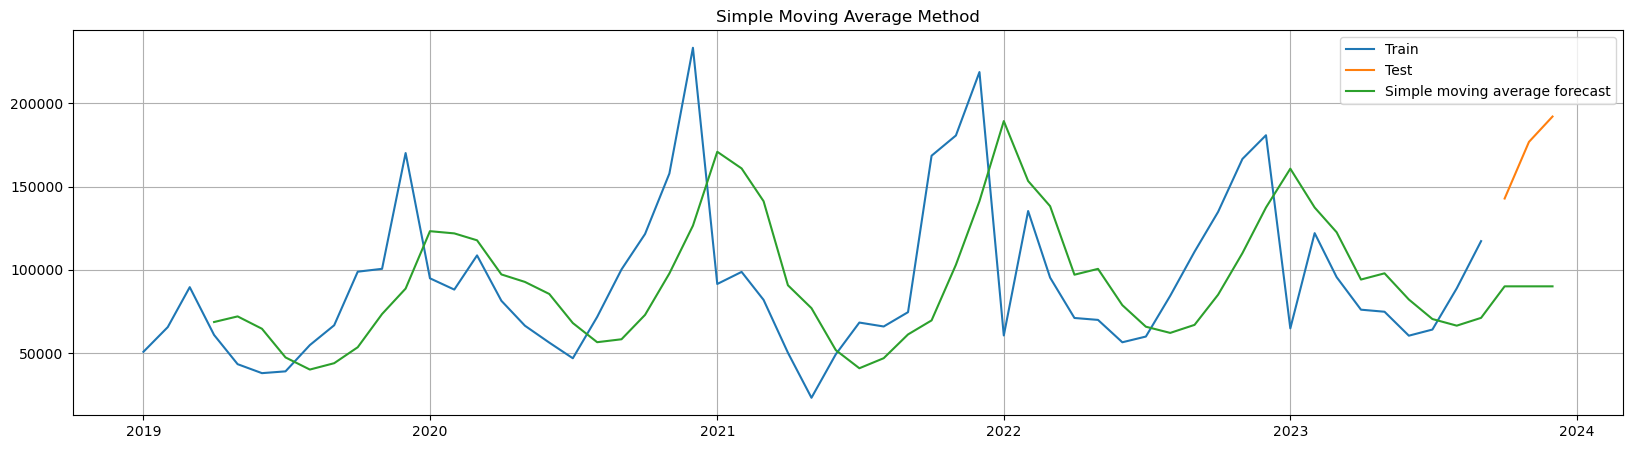

In [50]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train_3['Sales'], label='Train')
plt.plot(test_3['Sales'], label='Test')
plt.plot(y_hat_sma_3['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [51]:
y_hat_sma_3

,Sales,sma_forecast
Month-Year,,
2019-01-01,50833,NaN
2019-02-01,65670,NaN
2019-03-01,89667,NaN
2019-04-01,60960,68723.333333
2019-05-01,43410,72099.000000
2019-06-01,38023,64679.000000
2019-07-01,39097,47464.333333
2019-08-01,54870,40176.666667
2019-09-01,66773,43996.666667


In [52]:
pred_3= y_hat_sma_3['sma_forecast'].iloc[57:]

In [53]:
pred_3

Month-Year
2023-10-01    90150.0
2023-11-01    90150.0
2023-12-01    90150.0
Name: sma_forecast, dtype: float64

In [54]:
mae_3= mean_absolute_error(test_3,pred_3)
mse_3=mean_squared_error(test_3,pred_3)
mape_3= mean_absolute_percentage_error(test_3,pred_3)
rmse_3= np.sqrt(mean_squared_error(test_3,pred_3))

print(f'MAE - Simple Moving Averages_3 months: {mae_3:0.3f}')
print(f'MAPE - Simple Moving Averages_3 months: {mape_3:0.3f}')
print(f'MSE - Simple Moving Averages_3 months: {mse_3:0.3f}')
print(f'RMSE - Simple Moving Averages_3 months: {rmse_3:0.3f}')

MAE - Simple Moving Averages_3 months: 80483.667
MAPE - Simple Moving Averages_3 months: 0.463
MSE - Simple Moving Averages_3 months: 6901341689.667
RMSE - Simple Moving Averages_3 months: 83074.314
